Variables
* ccbd.dm = Corpus Callosum Body, Diamater
* ccbd.ml = Corpus Callosum Body, Mean Length
* sl2l.dm = Superior Longitudinal Fasciculus 2 Left, Diamater
* sl2l.ml = Superior Longitudinal Fasciculus 2 Left, Mean Length
* tral.vl = Thalamic Radiation Anterior Left, Volume

Algunas preguntas:
* ¿Es posible identificar variables confusoras?

Preguntas de intervención:
--Son preguntas un poco tiradas pero ayudan a entender el concepto.--
* ¿Aumentar ccbd.dm afecta al sujeto de estudio?, 
* ¿Cómo cambia la probabilidad de esquizofrenia si controla regularmente ccbd.dm? 
* Disminuiría la esquizofrenia si aumentara ccbd.ml
* Disminuiría la esquizofrenia si aumentara sl2l.dm
* Disminuiría la esquizofrenia si aumentara sl2l.ml
* Disminuiría la esquizofrenia si aumentara tral.vl?

Preguntas de predicción: (ejemplo de prueba)
* ¿Cuál es la probabilidad de que un sujeto de estudio sufra de esquizofrenia si tiene ccbd.dm = 0.5, ccbd.ml = 0.5, sl2l.dm = 0.5, sl2l.ml = 0.5, tral.vl = 0.5?
* 
Preguntas contrafacticas:
* ¿El sujeto de estudio habría sufrido de la patología si hubiera controlado ccbd.dm un año antes? 
* "¿un paciente dado habría sufrido insuficiencia cardíaca si hubiera comenzado a hacer ejercicio un año antes?

Datos que poseemos
* Tenemos datos observacionales con intervenciones (niveles de tratamientos de cada factor) desconocidas en sus features (factores) y con un target conocido. Utilizamos ingeniería de features para crear un nuevo dataset de features seleccionados a partir de la importante granularidad de datos de alto nivel (nombres fascículos y sus propiedades), buscando el camino de las intervenciones con conocimiento de dominio.
* 

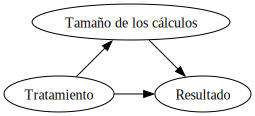

In [1]:
#@title {display-mode: "form"}
from graphviz import Digraph
from IPython.display import display

#Especificamos engine='neato' para poder usar argumento `pos` en nodos
dot = Digraph(engine='neato')
dot.node('T', 'Tratamiento', pos='1,1!')
dot.node('Y', 'Resultado', pos='3,1!')
dot.node('X', 'Tamaño de los cálculos', pos='2,2!')
dot.edges(['TY', 'XY', 'TX'])
dot

# Identificar versus estimar

Es importante distinguir entre algunos conceptos:

- **Estimando y estimador**. El _estimando_ es la cantidad que queremos estimar, que en casos paramétricos suele ser alguno de los parámetros poblacionales (por ejemplo $\beta_1$). En cambio, el _estimador_ es una función de los datos (es decir un _estadístico_) que nos permite aproximarnos al valor real (por ejemplo $\hat{\beta}_1$, el valor calculado por cuadrados mínimos, estima $\beta_1$).

Hay dos tipos de estimandos:
- **Estimando causal**: es un estimando que involucra contrafácticos y por lo tanto no es inmediatamente calculable (involucra "datos faltantes" imposibles de medir). El que venimos viendo fundamentalmente es el ATE, $\E[Y(1)] - \E[Y(0)]$
- **Estimando estadístico**: es un estimando que no involucra contrafácticos y por lo tanto puede ser calculado a partir de los datos sobre lo que realmente ocurrió (independientemente de si tenemos acceso o no a esos datos).

Y esto es fundamental para distinguir claramente dos etapas del análisis causal:

- **Identificación** es el proceso de utilizar hipótesis causales para transformar un estimando causal en un estimando estadístico equivalente.
- **Estimación**: es el proceso de elegir y calcular un estimador para nuestro estimando elegido previamente.

TENER EN CUENTA
- ¡Sin contrafácticos no hay causalidad!
- ¡Sin hipótesis causales, no hay conclusiones causales!